# Making plots to visualize the IR spectra for different compounds at the same time


In [1]:
#Arshad Chowdhury
#June 14, 2022 

%matplotlib inline 
import sys
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from pylab import cm
from sklearn.metrics import confusion_matrix    #confusion matrix
import seaborn as sns  #heat map
import glob # batch processing of images
from scipy import signal


if '../../' not in sys.path:
    sys.path.append('../../')
from vocnet.spectral_datasets.THz_datasets import THz_data
from vocnet.misc.aperture import publication_fig

In [2]:
# Collect all the font names available to matplotlib
font_names = [f.name for f in fm.fontManager.ttflist]
# print(font_names)

In [3]:
s = THz_data(resolution=0.016, verbosity=True)
s.load_THz_data()
s.dataset_info()

Number of Compounds: 12
Number of Spectrum: 164
Total Number of Spectra: 1968
Sample Size of training data: 229
Rows discarded: 22
Resolution (1/cm) =  0.016
Loading CH3Cl... 
CH3Cl Data in Memory 
Loading CH3OH... 
CH3OH Data in Memory 
Loading HCOOH... 
HCOOH Data in Memory 
Loading H2CO... 
H2CO Data in Memory 
Loading H2S... 
H2S Data in Memory 
Loading SO2... 
SO2 Data in Memory 
Loading OCS... 
OCS Data in Memory 
Loading HCN... 
HCN Data in Memory 
Loading CH3CN... 
CH3CN Data in Memory 
Loading HNO3... 
HNO3 Data in Memory 
Loading C2H5OH... 
C2H5OH Data in Memory 
Loading CH3CHO... 
CH3CHO Data in Memory 
shape of spectra (features): (1968, 229)
shape of labels: (1968,)

 no. of discarded rows 22

 samplesize (no. of sampling points) 229

 labels of molecules present 
 ['CH3Cl', 'CH3OH', 'HCOOH', 'H2CO', 'H2S', 'SO2', 'OCS', 'HCN', 'CH3CN', 'HNO3', 'C2H5OH', 'CH3CHO']

 target indices (integers) of molecules present [ 0  0  0 ... 11 11 11]

 frequencies present in the data 
  

In [4]:
# Rebuild the matplotlib font cache
fm._rebuild()
# Generate 2 colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', 12)

In [5]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$CH_3Cl$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/CH3Cl.png', bbox_inches='tight')

### color names
darkorange, forestgreen, royalblue, crimson, darkgoldenrod, lightseagreen, cornflowerblue, indianred, darkkhaki, teal,
firebrick, olivedrab, darkturquoise, maroon ,darkolivegreen, saddlebrown, green ,blueviolet, sienna, slategrey, darkcyan,
mediumvioletred, mediumseagreen, peru, slateblue, fuchsia, deepskyblue, red, navy ,chocolate, indigo, darkviolet,


In [6]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+1*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$CH_3OH$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/CH3OH.png', bbox_inches='tight')

['CH3Cl', 'CH3OH', 'HCOOH', 'H2CO', 'H2S', 'SO2', 'OCS', 'HCN', 'CH3CN', 'HNO3', 'C2H5OH', 'CH3CHO']


In [7]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+2*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$HCOOH$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/HCOOH.png', bbox_inches='tight')

In [8]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+3*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$H_2CO$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/H2CO.png', bbox_inches='tight')

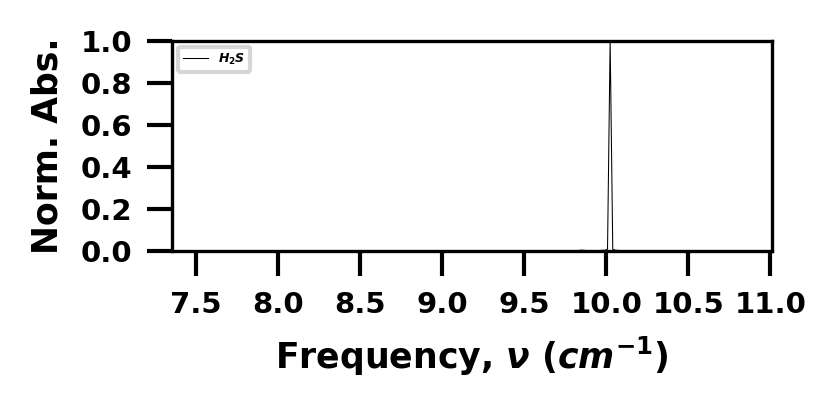

In [9]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+4*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$H_2S$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/H2S.png', bbox_inches='tight')

In [10]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+5*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$SO_2$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/SO2.png', bbox_inches='tight')

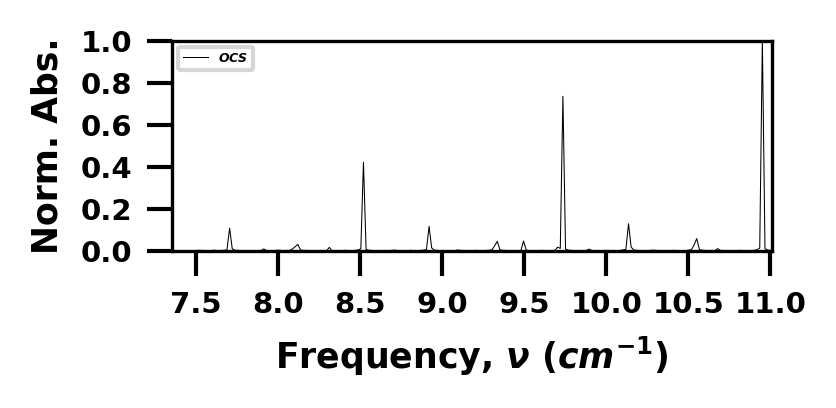

In [11]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+6*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$OCS$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/OCS.png', bbox_inches='tight')

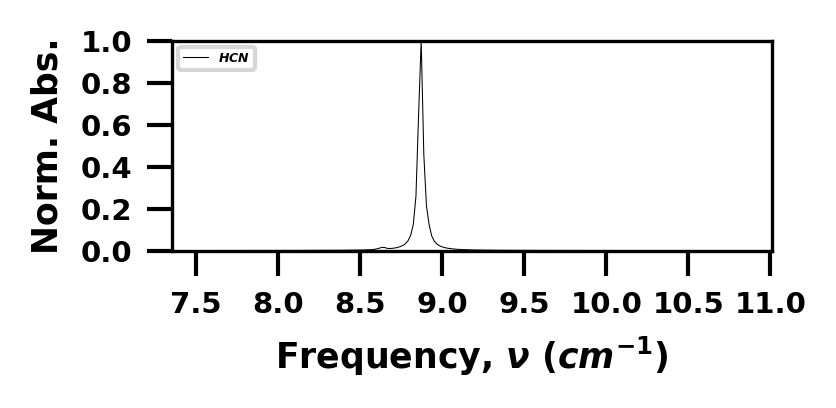

In [12]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+7*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$HCN$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/HCN.png', bbox_inches='tight')

In [13]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+8*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$CH_3CN$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/CH3CN.png', bbox_inches='tight')

In [14]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+9*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$HNO_3$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/HNO3.png', bbox_inches='tight')

In [15]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+10*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$C_2H_5OH$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/C2H5OH.png', bbox_inches='tight')

In [16]:
fig, ax  = publication_fig(s.frequencies, 
                   s.spectra[7+11*164], 
                   xlim_low=s.frequencies[0],
                   xlim_high=s.frequencies[-1]+0.01, 
                   ylim_low=0,
                   ylim_high=1.00,
                   fig_prop = {'figsize':(2,0.7), 'dpi':300, 'ax_rect': [0,0,1,1]},
                   plot_prop = {'linewidth':0.25, 'color':'black' , 'fontweight':'bold', 'label' : '$CH_3CHO$'},
                   legend_prop = {'loc':2, 'size':3},
                   major_tick_params =  {'which':'major', 'size':6, 'width':1, 'direction':'out','labelsize':7},
                   minor_tick_params =  {'which':'minor', 'size':2, 'width':1, 'direction':'out','labelsize':7},
                   tick_locator = {'xmajor':0.5, 'xminor':1.5, 'ymajor':0.2, 'yminor':0.4},
                   xlabelinfo = {'xlabel': r'Frequency, $\nu$ ($cm^{-1}$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   ylabelinfo = {'ylabel': r'Norm. Abs.', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'},
                   twin_xlabelinfo = {'xlabel': 'Wavelength ($mm$)', 'labelpad':4, 'fontsize':'small', 'fontweight':'bold'}, 
                   plot_flags = {'twinx': False, 'legend':True}
                   );

fig.savefig(r'RESULTS/Normalized_figures/CH3CHO.png', bbox_inches='tight')